In [325]:
import warnings
warnings.filterwarnings("ignore")

import re
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [295]:
df=pd.read_csv('cleaned_data.csv')
df['movie_title'] = df['movie_title'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [296]:
X=df.iloc[:,df.columns != 'movie_title']

In [297]:
X

,duration,title_year,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,actor3_col4,actor3_col5,actor3_col6,actor3_col7,actor3_col8,actor3_col9,actor3_col10,actor3_col11,actor3_col12,actor3_col13
0,148.0,2015,6.8,1,1,0,0,0,0,0,...,1,1,0,1,1,0,1,1,0,1
1,132.0,2012,6.6,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,100.0,2010,7.8,0,1,1,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
3,141.0,2015,7.5,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,153.0,2009,7.5,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,81.0,1992,6.9,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4502,84.0,2005,7.8,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
4503,95.0,2011,6.4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
4504,100.0,2012,6.3,0,0,0,0,1,0,0,...,0,1,1,1,1,1,1,1,1,1


## PCA for noise reduction

In [298]:
pca=PCA()

In [299]:
X_pca=pca.fit_transform(X)

In [300]:
var_ratio=pca.explained_variance_ratio_

In [301]:
var_ratio

array([6.27615695e-01, 3.40059876e-01, 2.48810662e-03, 1.13560419e-03,
       8.97588495e-04, 8.43472617e-04, 8.06907401e-04, 7.89757624e-04,
       7.65976414e-04, 7.25106121e-04, 7.08839991e-04, 6.92442494e-04,
       6.75343018e-04, 6.70044965e-04, 6.61659489e-04, 6.46480767e-04,
       6.39201949e-04, 6.36296722e-04, 6.29243282e-04, 6.23362687e-04,
       6.18309225e-04, 6.07344450e-04, 6.02261312e-04, 5.95984731e-04,
       5.91049870e-04, 5.86987036e-04, 5.82075191e-04, 5.71558634e-04,
       5.66302638e-04, 5.62370109e-04, 5.54261281e-04, 5.47438128e-04,
       5.38026478e-04, 5.26509764e-04, 5.25321804e-04, 5.22215228e-04,
       5.16357700e-04, 5.09090233e-04, 4.79225405e-04, 4.70368748e-04,
       4.55154745e-04, 4.54518628e-04, 4.48056868e-04, 4.09406000e-04,
       3.90161441e-04, 3.39529919e-04, 3.07556511e-04, 2.62775947e-04,
       2.56453593e-04, 2.46255627e-04, 2.37479666e-04, 2.32496116e-04,
       1.98503232e-04, 1.88485557e-04, 1.74370794e-04, 1.55253667e-04,
      

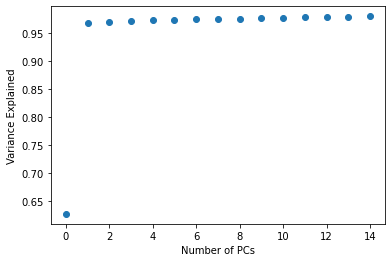

In [302]:
plt.scatter(range(len(var_ratio.cumsum()[:15])), var_ratio.cumsum()[:15])
plt.xlabel("Number of PCs")
plt.ylabel("Variance Explained");

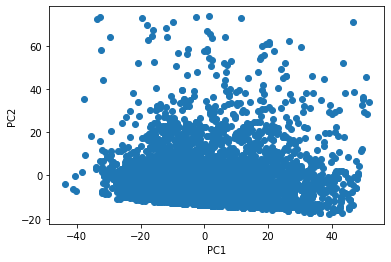

In [303]:
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [304]:
X_pca[0]

array([ 4.02443344e+01, -1.69020153e+01,  6.76351025e-01,  2.07379668e-01,
        1.31198548e+00, -1.47866789e-01,  8.90229557e-01, -1.94758178e-01,
       -6.68096566e-01,  1.06579961e-01,  5.96731376e-01,  2.38928082e-01,
        3.62392798e-01,  6.56049724e-01,  5.17135611e-01, -6.15227925e-01,
        1.75834699e-01, -5.43908985e-01,  4.72313819e-01, -2.17716382e-01,
        9.09962348e-01, -5.96036529e-01, -4.83485812e-02, -2.33052649e-01,
       -1.24285566e-01, -6.89760599e-02, -3.44646213e-01,  1.29848119e-01,
        2.03591868e-01, -4.57195018e-02,  6.25264034e-01, -1.26752451e+00,
       -9.24558881e-01,  2.52246504e-02,  4.27244092e-01,  5.35300645e-01,
       -2.39389823e-01, -2.67550919e-01,  2.73056823e-01, -8.81734173e-02,
        6.22049265e-01,  9.71026776e-01,  2.94549466e-01,  1.17657751e-01,
        5.61526866e-02,  2.46158884e-01,  5.17497654e-02,  1.92348441e-01,
       -4.91129921e-01,  5.74025455e-01,  2.96350081e-02,  3.04088037e-01,
       -6.39699035e-01, -

#### first 2 PCs cover almost 97% data

In [305]:
pca=PCA(n_components=2)

In [306]:
X_pca=pca.fit_transform(X)

In [307]:
X_pca

array([[ 40.24433438, -16.90201531],
       [ 24.64433857, -12.2424431 ],
       [ -6.95278816,  -6.85499893],
       ...,
       [-12.04797791,  -7.35859191],
       [ -7.17983648,  -8.88256053],
       [-16.28094772,   0.12693569]])

In [308]:
points=X_pca

In [309]:
x = points[:, 0]
y = points[:, 1]

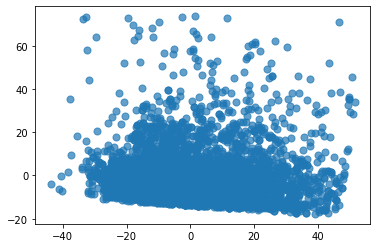

In [310]:
plt.scatter(x, y, s=50, alpha=0.7)

#### Finding elbow where inertias change drastically, through visualisation

In [311]:
inertias=[]
for i in range(2,100):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

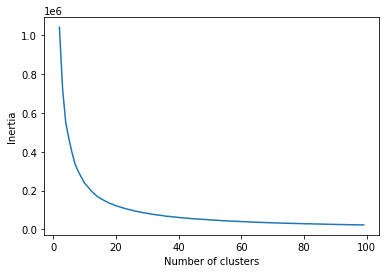

In [312]:
plt.plot(range(2, 100), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

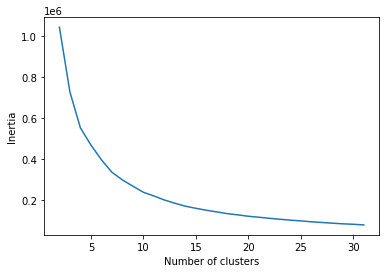

In [313]:
plt.plot(range(2, 32), inertias[0:30])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

Text(0, 0.5, 'Inertia')

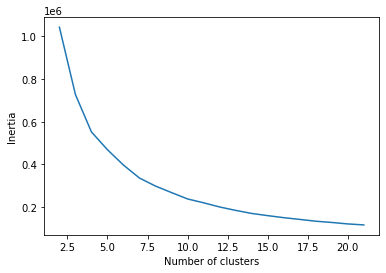

In [314]:
plt.plot(range(2, 22), inertias[0:20])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### There are elbows at 7 and 10, later we could decide based on recommendations

In [315]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [316]:
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

In [317]:
cluster_centres = {i : kmeans.cluster_centers_[i] for i in range(kmeans.n_clusters)}

In [318]:
cluster_centres

{0: array([16.09234944, -9.05558558]),
 1: array([-6.62629899,  3.15052848]),
 2: array([24.79171401, 26.52055267]),
 3: array([-21.75718317,   1.38197977]),
 4: array([-6.50145904, 21.35627127]),
 5: array([-13.51916235,  -6.6884762 ]),
 6: array([11.93406026,  3.82552868]),
 7: array([ 1.45153908, 58.17092999]),
 8: array([ 0.4455961 , -7.57579365]),
 9: array([33.60741638, -4.77537988])}

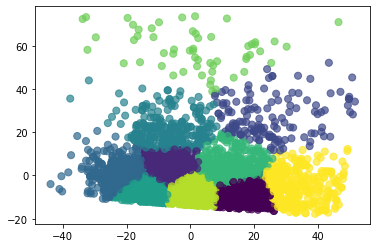

In [319]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

In [321]:
df['clusters']=predicted_cluster_indexes

In [323]:
search_df = pd.DataFrame([x,y,df.movie_title.values,predicted_cluster_indexes]).T
search_df.columns = ['PC1', 'PC2', 'movie_title', 'cluster']

In [324]:
search_df

,PC1,PC2,movie_title,cluster
0,40.244334,-16.902015,Spectre,9
1,24.644339,-12.242443,John Carter,0
2,-6.952788,-6.854999,Tangled,5
3,33.29899,-16.158285,Avengers: Age of Ultron,9
4,45.845343,-11.440194,Harry Potter and the Half-Blood Prince,9
...,...,...,...,...
4501,-23.945386,13.00833,El Mariachi,3
4502,-22.306827,-0.230137,The Mongol King,3
4503,-12.047978,-7.358592,Newlyweds,5
4504,-7.179836,-8.882561,Shanghai Calling,5


In [378]:
def get_recommendations(movie_watched, df, search_df):
    movie_info = df[df['movie_title'].str.contains(movie_watched, flags = re.IGNORECASE)]
    if movie_info.shape[0] == 0:
        print(f"Uh-Oh! Couldn't find this movie in our Database.")
        recommendations = [df.sort_values(by = 'imdb_score', ascending = False)['movie_title'].values[0]]
    else:
        print("Movie(s) Found!")
        print(movie_info['movie_title'].values)
        for _ in range(1, 3):
            print(f"Getting Recommendations {'*'*_}{'-'*(2-_)}")
            time.sleep(1)
        movie_info.drop(['movie_title', 'clusters'], inplace=True, axis = 1)
        features = pca.transform(movie_info)
        features = features[0] # If there are multiple movies in search, use only the first one for now!
        
        dists = []
        cluster_no = 0
        for i in cluster_centres.values():
            dists.append((cluster_no, np.sqrt(np.sum(np.square(features-i)))))
            cluster_no+=1

        dists = sorted(dists, key = lambda x : (x[1]))

        check_clusters = [dists[0][0]]
        for i in range(1, len(dists)):
            if dists[i][1]-dists[0][1] <= 10:
                check_clusters.append(dists[i][0])
            else:
                break

        filtered_search_df = search_df.query(f'cluster in {check_clusters}')
        filtered_search_df['dists'] = (((filtered_search_df[['PC1', 'PC2']] - features)**2)['PC1'] + ((filtered_search_df[['PC1', 'PC2']] - features)**2)['PC2'])**0.5
        recommendations = filtered_search_df.sort_values(by = 'dists')['movie_title'].values[1:3]
    return recommendations

In [381]:
movie_name = input("Which movie did you watch recently?")
recommendations = get_recommendations(movie_name, df, search_df)
if len(recommendations) == 1:
    print(f"You could try watching {recommendations[0]}")
else:
    print(f"We recommend you watching '{recommendations[0]}' or '{recommendations[1]}'")

Movie(s) Found!
['Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Prisoner of Azkaban']
Getting Recommendations *-
Getting Recommendations **
We recommend you watching 'Funny People' or 'Inglourious Basterds'
